# Dog Breed Competition

### get the data

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import os
os.makedirs('/home/zlandes/fastai/courses/dl1/data/dogbreed/')

In [6]:
CREDS = []
with open('/home/zlandes/fastai/CRED.txt') as f:
    for line in f:
        CREDS.append(line.strip('\n').split(':')[1])

In [7]:
from kaggle_data.downloader import KaggleDataDownloader

destination_path = "/home/zlandes/fastai/courses/dl1/data/dogbreed/"

downloader = KaggleDataDownloader(CREDS[0], CREDS[1], "dog-breed-identification")
output_path = downloader.download_dataset("train.zip", destination_path)
downloader.decompress(output_path, destination_path)

train.zip N/A% |                                     | ETA:  --:--:--   0.0 s/B

downloading https://www.kaggle.com/c/dog-breed-identification/download/train.zip to /home/zlandes/fastai/courses/dl1/data/dogbreed/train.zip



train.zip 100% |####################################| Time: 0:00:47   7.3 MiB/s


Extracting /home/zlandes/fastai/courses/dl1/data/dogbreed/train.zip to /home/zlandes/fastai/courses/dl1/data/dogbreed/ ...
Extraction finished


IsADirectoryError: [Errno 21] Is a directory: '/home/zlandes/fastai/courses/dl1/data/dogbreed/train'

In [8]:
downloader = KaggleDataDownloader(CREDS[0], CREDS[1], "dog-breed-identification")
output_path = downloader.download_dataset("test.zip", destination_path)
downloader.decompress(output_path, destination_path)

test.zip N/A% |                                      | ETA:  --:--:--   0.0 s/B

downloading https://www.kaggle.com/c/dog-breed-identification/download/test.zip to /home/zlandes/fastai/courses/dl1/data/dogbreed/test.zip



test.zip 100% |#####################################| Time: 0:00:48   7.1 MiB/s


Extracting /home/zlandes/fastai/courses/dl1/data/dogbreed/test.zip to /home/zlandes/fastai/courses/dl1/data/dogbreed/ ...
Extraction finished


In [9]:
downloader = KaggleDataDownloader(CREDS[0], CREDS[1], "dog-breed-identification")
output_path = downloader.download_dataset("labels.csv.zip", destination_path)
downloader.decompress(output_path, destination_path)

labels.csv.zip N/A% |                                | ETA:  --:--:--   0.0 s/B

downloading https://www.kaggle.com/c/dog-breed-identification/download/labels.csv.zip to /home/zlandes/fastai/courses/dl1/data/dogbreed/labels.csv.zip



labels.csv.zip 100% |###############################| Time: 0:00:00 450.4 KiB/s


Extracting /home/zlandes/fastai/courses/dl1/data/dogbreed/labels.csv.zip to /home/zlandes/fastai/courses/dl1/data/dogbreed/ ...
Extraction finished


### Sort the Data

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "/home/zlandes/fastai/courses/dl1/data/dogbreed/"

In [5]:
labels_df = pd.read_csv(f'{PATH}labels.csv')

In [6]:
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
labels = labels_df.breed.unique().tolist()

In [8]:
import os, sys, random, zipfile
from importlib import reload  # Python 3
import numpy as np
import shutil
from glob import glob

In [23]:
with open(f'{PATH}labels.txt', 'w') as f:
    for breed in labels:
        f.write(f"{breed}\n")

In [26]:
LABEL_LIST = "labels.txt" #made a textfile from the list of breeds provided
ID_MAP = "labels.csv"

STORAGE_DIR = PATH
TRAIN_DIR = STORAGE_DIR + "train/"
VAL_DIR = STORAGE_DIR + "valid/"

SAMPLE_DIR = STORAGE_DIR + "sample/"
SAMPLE_TRAIN = SAMPLE_DIR + "train/"
SAMPLE_VAL = SAMPLE_DIR + "valid/"

RESULTS_DIR = STORAGE_DIR + "results/"

In [27]:
%cd $STORAGE_DIR

if not os.path.isdir(TRAIN_DIR):
    %mkdir $TRAIN_DIR

if not os.path.isdir(VAL_DIR):
    %mkdir $VAL_DIR
    
if not os.path.isdir(SAMPLE_DIR):
    %mkdir $SAMPLE_DIR
    
if not os.path.isdir(SAMPLE_TRAIN):
    %mkdir $SAMPLE_TRAIN

if not os.path.isdir(SAMPLE_VAL):
    %mkdir $SAMPLE_VAL
    
if not os.path.isdir(RESULTS_DIR):
    %mkdir $RESULTS_DIR

/home/zlandes/fastai/courses/dl1/data/dogbreed


In [28]:
def processLabels(labels, path):
    %cd $path
    for label in labels:
        if not os.path.isdir(label):
            %mkdir $label

In [29]:
def selectRandomFiles(num, path):
    if len(os.listdir(path)) < num:
        num = len(os.listdir(path))
        
    selected = []
    while num >= len(selected):
            choice = random.choice(os.listdir(path))
            print("ch: " + choice)
            if choice not in selected:
                selected.append(choice)
    return selected

In [30]:
def createSampleSet(labels, samplePath, sourcePath, num):
    processLabels(labels, samplePath)
    for label in labels:
        existing = len(os.listdir(samplePath + label + "/"))
        if existing < num:
            files = selectRandomFiles(num - existing, sourcePath + label + "/")
            for file in files:
                src = sourcePath + label + "/" + file
                dest = samplePath + label + "/"
                shutil.copy2(src, dest)

In [31]:
def removeUnsortedFiles(path):
    files = glob(path + "*.jpg")
    for file in files:
        os.remove(file)

In [32]:
def createTrainingSet(labels, items):
    processLabels(labels, TRAIN_DIR)
    for item in items:
        file = TRAIN_DIR + item[0] + ".jpg"
        dest = TRAIN_DIR + item[1] + "/" + item[0] + ".jpg"
        if os.path.isfile(file):
            shutil.copy2(file, dest)
    createSampleSet(labels, SAMPLE_TRAIN, TRAIN_DIR, 16)
    removeUnsortedFiles(TRAIN_DIR)

In [33]:
def createValidationSet(lables):
    processLabels(labels, VAL_DIR)
    for label in labels:
        existing = len(os.listdir(VAL_DIR + label))
        if(existing > 0):
             continue
        files = os.listdir(TRAIN_DIR + label)
        numForValid = int(np.ceil(len(files) * .2))
        for file in files[-numForValid:]:
            src = TRAIN_DIR + label + "/" + file
            dest = VAL_DIR + label + "/" + file
            shutil.copy2(src , dest)
            os.remove(src)
    createSampleSet(labels, SAMPLE_VAL, VAL_DIR, 4)

In [34]:
def sortData(labels):
    items = np.loadtxt(STORAGE_DIR + ID_MAP, delimiter=',', dtype=str, skiprows=1)
    createTrainingSet(labels, items)
    createValidationSet(labels)

In [35]:
def getLabels():
    if os.path.isfile(STORAGE_DIR + LABEL_LIST):
        try: 
            f = open(STORAGE_DIR + LABEL_LIST, 'r')
            fileString = f.read()
            return fileString.splitlines()
        except IOError:
            print("Could not read file: ", LABEL_LIST)
    return []

In [36]:
labels = getLabels()
sortData(labels)

/home/zlandes/fastai/courses/dl1/data/dogbreed/train
/home/zlandes/fastai/courses/dl1/data/dogbreed/sample/train
ch: d6fb643ed203d7d01db9a4744526f2ea.jpg
ch: baa740b07dfb86b187041dd39a2eef1b.jpg
ch: f19b045bcf373d6fcf05c80247850d50.jpg
ch: df12a66b9b154c8bbe922846944e2ef2.jpg
ch: 0755a940eac9a9b8cf0328b4be062096.jpg
ch: fd73ff7c6b24e7292701305e8c7c32c2.jpg
ch: c790a45b98d586f77f428b07f1fb1f17.jpg
ch: 8befc822b56b744d72872428a0ef4851.jpg
ch: 20be3ce1dd7db9194c856726c2f154a3.jpg
ch: 172fcb0b8bbd67401c9e53e5f9bf39bc.jpg
ch: ee88ac6bfed3abb8713bbc988b87eb80.jpg
ch: aa7d9f08fc9ac1d45117848137adce9c.jpg
ch: d6fb643ed203d7d01db9a4744526f2ea.jpg
ch: 33a255a956f02a591865dbe9768eff77.jpg
ch: 146be641443a270dd8116f65d53d0c9d.jpg
ch: 8233f609f7a39f0f834894e761d73aa0.jpg
ch: 387ae89153da8b0171322ab0cd54923e.jpg
ch: d6857f130c251f01ab973358cbfccce1.jpg
ch: 89e04e8b173e1bd50911a94ddd6f1dd9.jpg
ch: 5b9d8ed1262f86e057409632be56ce7f.jpg
ch: 980657a2afaf0fdd549e166fa899407e.jpg
ch: 0ec8020bc2c4bc1646a817

ch: 625998b56406aad405e933d3a16539cf.jpg
ch: 9012a23092a021327763c4227cfa2f62.jpg
ch: 2cf1754ae1696b36d07bfe6f5b48c3a8.jpg
ch: 2dd680898f48be646e420a2d30418c02.jpg
ch: 06d80d6a7aba8bc48606a285bbad0697.jpg
ch: c4979ed313483b6b64f04385ff6453b7.jpg
ch: 874cacae6ec28f300b601919625d6724.jpg
ch: c7c6ff42d5b63555ec23fe5170fdcd90.jpg
ch: 3a0b757fe028356e4a80e344dd806970.jpg
ch: 4f0017038ac11483e95ccf1a66713200.jpg
ch: 857a4db72e722ecd29b900da9cee6036.jpg
ch: eca90f594e91b6689c0908e365cac5ce.jpg
ch: 9fddcca650e796157ab90ccebcfe36a4.jpg
ch: 8ce94c7eec80364765b1c21f440a7f9f.jpg
ch: 6e59216a1f0bfaea9786baa43c90ccdd.jpg
ch: 779f9ae1ab62563cb77672c38f91a1f0.jpg
ch: 5a19a893e14e0afe00f7018abdaf9992.jpg
ch: 566ff41f71d54cc2322c46cfdc96a998.jpg
ch: 3c1be3df90b1a242325de9590db32ce2.jpg
ch: 831b3e2e2fec0aef8e3527d5af458b42.jpg
ch: 448d0800b65c3d3688284172bac5366f.jpg
ch: a61c439d669536fe7c93e8df65e06798.jpg
ch: 16b17dfce7906f0e7a599a538c7ac106.jpg
ch: 4f0017038ac11483e95ccf1a66713200.jpg
ch: 008b1271ed1a

ch: e6c13efafeb9ead1ba224c0fe9edf59f.jpg
ch: f45060c4cac8b690aaa61a510e1d30c5.jpg
ch: 4304e5bba7efe64d9f07de0156a5beb5.jpg
ch: bf18acf12d970f9e93a414bce6315a4c.jpg
ch: 4304e5bba7efe64d9f07de0156a5beb5.jpg
ch: 340fefc7ed26ad3ec072944df5350094.jpg
ch: 0b6837976df682360dc9ef25b81bc893.jpg
ch: d8951830ecd4b5898a6484327dc6f294.jpg
ch: f8c2b71ba0ee8fb0b64a589f12c98618.jpg
ch: 860e42bbe81a5d30d00bdb77e2c38a80.jpg
ch: f5d05878affab9747f86aa1f13c52bd2.jpg
ch: 046b28d8ac6f7beb3f63159ecaf4cbb6.jpg
ch: 4b1d4e5e91b58eb73861a3841fe1ed02.jpg
ch: 1d951901580372d429c8c3744e6e094f.jpg
ch: 792dee870c0467ee84d772de1e23c9ee.jpg
ch: 895266d2f46fb569b66268155bf28aa5.jpg
ch: 35ae06a64b2c3efdb34349fef73bc726.jpg
ch: b4b94f2b42428a8260e67127bdeb4341.jpg
ch: 4b4b970f447e78e9e0094a482c24f90d.jpg
ch: 5c1ac175525a7b7f7acfbc6c59f9b47c.jpg
ch: d25477a0de377042bccdd6d3dd4c15d0.jpg
ch: 210c9a0264b1e9c2170e0fc5722189db.jpg
ch: 06223770cd0968a5fa81b2898e65e34a.jpg
ch: b49cdf4de3c6a0807520fce130559a27.jpg
ch: 5eaaffc76b99

ch: 8806c582754ce2fa439c410e1a2dd8ef.jpg
ch: e81c8db07ad9b5291435e3aa3ac728bf.jpg
ch: 23b5bbb8d8c7243765436fd0e35653ce.jpg
ch: 41f797c30d45a47de275352e7fae6af7.jpg
ch: 086e8ca78ec3303a8f06df003ecb6612.jpg
ch: f5d4b4e4770d3922b6b26dc46bdc57af.jpg
ch: d979688962729fa2cf50af1c9b478dca.jpg
ch: 24002364f324a040f35f6a69d5138435.jpg
ch: c4dbdd6201127e4f5b5ce08f6186834b.jpg
ch: ab999d8dfd944bd5450eb6d8e1432d43.jpg
ch: 5bea949c22544944e96ce424560e521d.jpg
ch: d00642800e4ca6d84887a93e3430ae21.jpg
ch: 4a8d3afc461d55418d1ee15304ca1b9b.jpg
ch: 143ce5343024462044b72de531b5ff08.jpg
ch: 7fab16b0b5722629627392b761e22e00.jpg
ch: 9ea7f8ae85ab9b6c2e48175978dbaf3e.jpg
ch: 87001075188b63c8edeb2ffaf4cdfca4.jpg
ch: 7d128b5bf4a8cc4962ad4265e1213bea.jpg
ch: 91af3f0d18e5bd9b09a145ff5db9cb65.jpg
ch: 11c3b389906a9302def1e873c9f9b6c9.jpg
ch: 815d3c084bcb79bed798a9774d4ce66b.jpg
ch: 70f53ca636322917d71fdd05f1a7f380.jpg
ch: e4245709e4060e08146b5fe1af72385d.jpg
ch: 7d128b5bf4a8cc4962ad4265e1213bea.jpg
ch: f14f1200ba75

ch: 84564a69c0d0fa36e0810188943683a1.jpg
ch: fdcf75632c624d8d03b37ddb1c6fc592.jpg
ch: c2ae87dae29b344f92d82983d521d5d5.jpg
ch: 3d82b3443139b274dc44be5ac4679ed9.jpg
ch: 916acab38c9b1ef122851c0815c6826a.jpg
ch: dcc19db6b4e117d5e4f7d1b00fbe3982.jpg
ch: 685b0a223c6ec08677df6800250d8cfd.jpg
ch: cedcd40ba220aafc622ebc603c2cdf25.jpg
ch: d96c7a1efc7455d533bb2beb4da27896.jpg
ch: 73c7d86c561dce0f82e6dec7266bea79.jpg
ch: e75f2316c5dd47b87a22bbe95cf8b8da.jpg
ch: 73c7d86c561dce0f82e6dec7266bea79.jpg
ch: 417efae72babc6847bc551654d339ecd.jpg
ch: 62759db195cd415727d87d344726f5ea.jpg
ch: d63348c8d835cd499da54d8de6a11803.jpg
ch: 62759db195cd415727d87d344726f5ea.jpg
ch: 417efae72babc6847bc551654d339ecd.jpg
ch: 302e4507ef9c5ba2c0b26ab890cd250c.jpg
ch: 45fef015b1974e98da0173e8260b3482.jpg
ch: 28841f65fee77e887962b18f6670d4a0.jpg
ch: cdba761dfa000859fb4a89f56730e513.jpg
ch: 7c036cc0f15aea204c2760897410e799.jpg
ch: 36c8a8c901324e0c34db896724abec3b.jpg
ch: 0b2d69f59303805f17055bd59615a297.jpg
ch: f8972355cef9

ch: 5724919ea5c428e564ec77c24850e153.jpg
ch: 4e1a4b8dbca28978edd145617a2a0123.jpg
ch: 2c3db3a8da1a65eaef44485bb8477f9b.jpg
ch: 61c2aa6e1b99275cdb2281f392dc47a8.jpg
ch: 4e1a4b8dbca28978edd145617a2a0123.jpg
ch: 80e133f30d0c46942517a82581be7daf.jpg
ch: 45796593d59bdc14ad227000de470c0d.jpg
ch: e517cb6c5a2942b6a1b545e84551372f.jpg
ch: b74e428a933c308646bf769d309e7a8b.jpg
ch: 4d705f069d5a67c6132c386cc25ed117.jpg
ch: b74e428a933c308646bf769d309e7a8b.jpg
ch: 7a5ac22642a9ad1ede2461cdf7d27050.jpg
ch: 6342835fdefefa74d102b4716a151c88.jpg
ch: 90d74633492b3e4ec00767dc695e80eb.jpg
ch: 9e0aeb0f36433ddddcbf36154e51e62a.jpg
ch: e4cb3bc8fc0dd15216e26c00a7b17d81.jpg
ch: 75698e8be83cb8e8cf6e2011d29b07ee.jpg
ch: 367eac45f0bf515a1e40fae2ec321923.jpg
ch: 9ca75c6889227cb3beffe2e4f929bcce.jpg
ch: 367eac45f0bf515a1e40fae2ec321923.jpg
ch: 3218df2f90a507530be3f1c2a5b5d899.jpg
ch: c577c620fc1c49c52706683485f9d147.jpg
ch: 9ca75c6889227cb3beffe2e4f929bcce.jpg
ch: 621a386b133d73ad65e03a028eff0da9.jpg
ch: 888631e69318

### Build a Model 

In [5]:
sz=224

In [6]:
%ls {PATH}

dog_breeds_resnet34_submissions1.csv  labels.txt  sample/                tmp/
dog_breeds_resnet34_submissions2.csv  models/     sample_submission.csv  train/
labels.csv                            results/    test/                  valid/


In [11]:
os.listdir(PATH)

['sample_submission.csv',
 'labels.csv',
 'dog_breeds_resnet34_submissions1.csv',
 'valid',
 'tmp',
 'models',
 'train',
 'results',
 'labels.txt',
 'dog_breeds_resnet34_submissions2.csv',
 'test',
 'sample']

In [12]:
os.listdir(f'{PATH}valid')

['rottweiler',
 'bernese_mountain_dog',
 'groenendael',
 'cardigan',
 'lhasa',
 'siberian_husky',
 'norwegian_elkhound',
 'shetland_sheepdog',
 'german_shepherd',
 'giant_schnauzer',
 'african_hunting_dog',
 'german_short-haired_pointer',
 'miniature_pinscher',
 'flat-coated_retriever',
 'cocker_spaniel',
 'chow',
 'entlebucher',
 'standard_schnauzer',
 'silky_terrier',
 'standard_poodle',
 'appenzeller',
 'english_setter',
 'old_english_sheepdog',
 'mexican_hairless',
 'doberman',
 'irish_water_spaniel',
 'clumber',
 'kelpie',
 'english_foxhound',
 'maltese_dog',
 'tibetan_mastiff',
 'basset',
 'australian_terrier',
 'english_springer',
 'bloodhound',
 'ibizan_hound',
 'blenheim_spaniel',
 'french_bulldog',
 'boxer',
 'komondor',
 'bedlington_terrier',
 'american_staffordshire_terrier',
 'cairn',
 'sussex_spaniel',
 'golden_retriever',
 'eskimo_dog',
 'bouvier_des_flandres',
 'lakeland_terrier',
 'kuvasz',
 'keeshond',
 'whippet',
 'beagle',
 'newfoundland',
 'kerry_blue_terrier',
 'l

In [13]:
files = os.listdir(f'{PATH}valid/golden_retriever')[:5]
files

['203a82da35da69a6517e0dce4d072071.jpg',
 '8e06a294fc3138b2db92db326d017967.jpg',
 'acfe87af21ad64e518f9ca6a64d728bd.jpg',
 'ede38d1fbd47fcc1c408fbd7f0084fef.jpg',
 '56e02e860ef31fa25a39f1640260e68e.jpg']

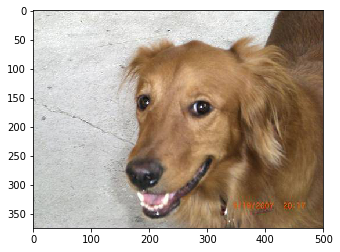

In [14]:
img = plt.imread(f'{PATH}valid/golden_retriever/{files[0]}')
plt.imshow(img)

In [15]:
img.shape

(375, 500, 3)

In [45]:
??ImageClassifierData

In [49]:
??ConvLearner

In [7]:
#specifying our model
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-1, 3)

100%|██████████| 33/33 [00:06<00:00,  5.08it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.300276   0.733979   0.772193  
    1      0.812261   0.674414   0.793228                     
    2      0.655954   0.623755   0.802789                     



[0.62375504, 0.8027885231104764]

In [79]:
#submission version
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 162/162 [00:28<00:00,  5.70it/s]


In [51]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 79%|███████▊  | 100/127 [00:00<00:00, 138.94it/s, loss=29.4]


In [52]:
??learn.lr_find()

In [54]:
??LR_Finder

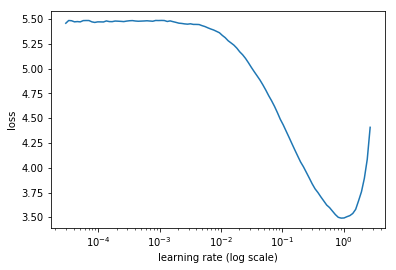

In [56]:
learn.sched.plot()

In [57]:
lr = 1e-1

In [125]:
learn.fit(lr, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.387771   0.650503   0.818716  
    1      0.33791    0.661315   0.811352                     
    2      0.337039   0.686418   0.809458                     



[0.68641824, 0.8094576073415352]

In [81]:
data??

In [62]:
data.val_y

array([  0,   0,   0, ..., 119, 119, 119])

In [63]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [126]:
log_preds = learn.predict()
log_preds.shape

(2095, 120)

In [127]:
log_preds[:10]

array([[ -0.00009, -24.25954, -19.59674, ..., -25.78115, -18.33819, -15.87109],
       [ -0.00005, -26.86519, -19.20698, ..., -27.72111, -19.35833, -18.14195],
       [ -0.05872, -15.11134, -15.12622, ..., -18.02809, -17.37345,  -3.04249],
       ...,
       [ -0.3714 , -10.80886, -11.43657, ..., -14.73064, -11.94981, -10.15321],
       [ -0.04777, -13.77358, -14.19205, ..., -18.16557, -14.28683,  -6.57914],
       [ -0.00011, -22.78024, -19.58192, ..., -28.19281, -20.56681,  -9.66925]], dtype=float32)

### TO DO: More Visualization of Data 

### Make a submission 

In [128]:
test_log_preds = learn.predict(is_test=True)
test_log_preds.shape

(10357, 120)

In [129]:
test_log_preds[:10]

array([[-36.1382 , -13.89512, -28.06087, ..., -19.00248, -28.13495, -21.60927],
       [-27.5221 , -17.5414 , -18.97897, ..., -13.73306, -25.54442, -25.95625],
       [-24.16918, -22.47342, -23.54904, ..., -17.90375, -13.21435, -19.94288],
       ...,
       [-20.97627, -17.09274, -19.85823, ..., -16.95867, -20.58574, -19.77854],
       [-18.70014, -17.01036, -18.54171, ..., -17.7078 , -15.76385, -15.65746],
       [-22.26463, -19.51174, -18.90419, ..., -26.58216, -19.16774, -18.56315]], dtype=float32)

In [130]:
test_preds = np.exp(test_log_preds)

In [131]:
test_preds[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
test_preds_clip = np.clip(test_preds,0.05,0.95)

In [89]:
test_preds_clip[:10]

array([[0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       ...,
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05]], dtype=float32)

In [104]:
print(labels)

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malino

In [114]:
labels = sorted(labels)

In [132]:
filenames=np.array([os.path.basename(fn).split('.')[0] for fn in data.test_ds.fnames])

In [116]:
test_df = pd.DataFrame(test_preds_clip, columns=labels)

In [117]:
test_df.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
1,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
3,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
4,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


In [118]:
test_df.shape

(10357, 120)

In [133]:
filenames.shape

(10357,)

In [120]:
test_df.insert(0,'id',filenames)

In [121]:
test_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,b31c997e5a2b5f12731fd1f550b22e4b,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
1,765411aed5e7b471be622120a65e690a,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
2,d8134377aaf65d92c780dd96330ccc4e,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
3,ad889aca15b6168db4dd7133ac5a8ba4,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
4,c1f7d46237cf527403e64b3b98481863,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


In [122]:
test_df.to_csv(f'{PATH}dog_breeds_resnet34_submissions1.csv', index=False)

Public leaderboard 2.49880 (888/1222)

### without clipping now (and a few more epochs)

In [134]:
test_df = pd.DataFrame(test_preds, columns=labels)

In [135]:
test_df.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,2.020139e-16,9.234728e-07,6.506092e-13,1.585799e-11,1.119955e-15,8.145783e-14,1.598904e-15,2.330348e-12,4.809304e-12,9.619751e-12,...,2.566560e-14,3.020793e-13,7.936204e-13,3.852764e-12,1.338610e-11,2.509448e-12,3.395977e-15,5.588943e-09,6.041543e-13,4.123007e-10
1,1.115078e-12,2.409173e-08,5.721873e-09,2.443937e-11,1.320724e-09,3.054994e-11,7.574780e-11,5.295528e-11,2.188117e-11,1.501104e-11,...,2.436265e-12,2.168944e-11,2.661001e-12,3.949800e-11,5.052883e-11,4.547675e-11,1.683786e-13,1.085940e-06,8.057511e-12,5.337598e-12
2,3.187561e-11,1.737473e-10,5.926266e-11,1.760184e-04,2.194929e-12,1.754626e-08,2.658823e-07,2.679058e-09,9.590443e-11,1.759318e-11,...,3.428733e-12,3.839881e-12,9.887995e-10,3.230363e-10,2.021748e-11,1.740619e-08,5.778404e-11,1.676877e-08,1.824235e-06,2.182321e-09
3,2.547523e-06,1.280058e-04,1.648562e-06,1.419167e-06,6.741623e-07,2.011904e-05,9.736048e-05,8.146966e-06,1.318694e-05,6.357265e-05,...,9.626723e-05,6.266967e-08,2.473774e-07,2.752882e-06,4.569373e-07,7.502170e-07,7.278561e-05,3.480462e-05,1.069418e-05,6.169095e-06
4,3.344445e-10,3.213043e-09,4.825722e-09,5.783339e-09,5.737190e-05,7.442580e-11,5.150288e-09,6.832337e-08,2.814287e-06,3.500227e-09,...,2.024788e-06,1.590778e-09,6.395652e-04,7.378052e-09,7.077254e-08,4.462551e-10,7.130514e-09,1.077885e-07,5.954686e-10,1.892725e-08


In [136]:
test_df.insert(0,'id',filenames)

In [137]:
test_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,b31c997e5a2b5f12731fd1f550b22e4b,2.020139e-16,9.234728e-07,6.506092e-13,1.585799e-11,1.119955e-15,8.145783e-14,1.598904e-15,2.330348e-12,4.809304e-12,...,2.566560e-14,3.020793e-13,7.936204e-13,3.852764e-12,1.338610e-11,2.509448e-12,3.395977e-15,5.588943e-09,6.041543e-13,4.123007e-10
1,765411aed5e7b471be622120a65e690a,1.115078e-12,2.409173e-08,5.721873e-09,2.443937e-11,1.320724e-09,3.054994e-11,7.574780e-11,5.295528e-11,2.188117e-11,...,2.436265e-12,2.168944e-11,2.661001e-12,3.949800e-11,5.052883e-11,4.547675e-11,1.683786e-13,1.085940e-06,8.057511e-12,5.337598e-12
2,d8134377aaf65d92c780dd96330ccc4e,3.187561e-11,1.737473e-10,5.926266e-11,1.760184e-04,2.194929e-12,1.754626e-08,2.658823e-07,2.679058e-09,9.590443e-11,...,3.428733e-12,3.839881e-12,9.887995e-10,3.230363e-10,2.021748e-11,1.740619e-08,5.778404e-11,1.676877e-08,1.824235e-06,2.182321e-09
3,ad889aca15b6168db4dd7133ac5a8ba4,2.547523e-06,1.280058e-04,1.648562e-06,1.419167e-06,6.741623e-07,2.011904e-05,9.736048e-05,8.146966e-06,1.318694e-05,...,9.626723e-05,6.266967e-08,2.473774e-07,2.752882e-06,4.569373e-07,7.502170e-07,7.278561e-05,3.480462e-05,1.069418e-05,6.169095e-06
4,c1f7d46237cf527403e64b3b98481863,3.344445e-10,3.213043e-09,4.825722e-09,5.783339e-09,5.737190e-05,7.442580e-11,5.150288e-09,6.832337e-08,2.814287e-06,...,2.024788e-06,1.590778e-09,6.395652e-04,7.378052e-09,7.077254e-08,4.462551e-10,7.130514e-09,1.077885e-07,5.954686e-10,1.892725e-08


In [138]:
test_df.to_csv(f'{PATH}dog_breeds_resnet34_submissions2.csv', index=False)

## Tuning Our Model Further 

### Data Augmentation 

In [23]:
PATH = "/home/zlandes/fastai/courses/dl1/data/dogbreed/"
#PATH = "/home/zlandes/fastai/courses/dl1/"

In [24]:
arch=resnet34

In [139]:
??tfms_from_model

In [10]:
!cd {'/home/zlandes/fastai/courses/dl1/'} && rm -rf .ipynb_checkpoints

In [33]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1), test_name='test')

In [34]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 162/162 [00:27<00:00,  5.98it/s]


In [13]:
learn.fit(1e-1, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      1.263757   0.675858   0.790861  



[0.6758585, 0.790860734202645]

did nothing because we used our old activations which were adapted to the original image files only

In [35]:
learn.precompute=False

In [15]:
learn.fit(1e-1, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.86756    0.687659   0.797197  
    1      0.747032   0.571549   0.819099                    
    2      0.680363   0.599586   0.808984                    



[0.59958595, 0.8089841224930503]

### Retraining Earlier Layers with Differential Learning Rates (and using LR annealing)

First let's see what happens with LR annealing.
cycle_len = 1 means we reset the learning rate every epoch. Also note we are using cosine annealing (so the learning rate is reduced every mini batch according to a "half" cosine curve). This is called SGD with Restarts

In [36]:
learn.fit(1e-1, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.268006   0.647905   0.797842  
    1      0.877408   0.590997   0.816822                    
    2      0.757532   0.578932   0.82336                     



[0.5789319, 0.8233599283478477]

Well that was a significant boost!

In [17]:
#save model time!
learn.save('224_lastlayer')

In [ ]:
learn.load('224_lastlayer')

#### And now for retraining all layers with (differential learning rates) 

In [18]:
learn.unfreeze()

In [19]:
#first block will have the smallest LR since we like the model that was trained on imagenet
#it probably doesnt need much adjustment for the early layers
lr=np.array([1e-3,1e-2,1e-1])

In [20]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.215409   0.792847   0.74864   
    1      1.066888   0.885419   0.722125                   
    2      0.567168   0.698771   0.778339                    
    3      0.828715   1.134366   0.693887                    
    4      0.592566   0.942877   0.734264                    
    5      0.337855   0.763497   0.781049                    
    6      0.217048   0.735698   0.788282                    



[0.7356976, 0.788281753207698]

Meh! That didn't help. Let's try one other idea...

In [21]:
learn.fit(lrc, 3, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.422269   1.060588   0.726739  
    1      0.257723   0.81367    0.769302                    
    2      0.442776   1.106999   0.721954                    
    3      0.242616   0.883356   0.767237                    
    4      0.329879   1.181575   0.70517                     
    5      0.210721   0.914989   0.771065                    



[0.9149895, 0.7710650382619916]

again, no good. Let's use our cycle_len=1, cycle_mult=1 model

## Make another submission

In [38]:
%time log_test_preds, y = learn.TTA(is_test=True)
preds = np.mean(np.exp(log_test_preds),0)

CPU times: user 8min 25s, sys: 35.6 s, total: 9min
Wall time: 1min 37s


In [39]:
preds.shape

(10357, 120)

In [40]:
preds[:10]

array([[0.     , 0.01037, 0.     , ..., 0.00106, 0.00005, 0.00001],
       [0.     , 0.00001, 0.00003, ..., 0.00059, 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.00007, 0.00054, 0.     ],
       ...,
       [0.00009, 0.00006, 0.00007, ..., 0.00028, 0.     , 0.     ],
       [0.     , 0.00002, 0.     , ..., 0.00001, 0.00003, 0.00001],
       [0.     , 0.00005, 0.     , ..., 0.     , 0.     , 0.     ]], dtype=float32)

In [42]:
labels = data.classes
labels

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [43]:
filenames=np.array([os.path.basename(fn).split('.')[0] for fn in data.test_ds.fnames])

In [44]:
test_df = pd.DataFrame(preds, columns=labels)

In [45]:
test_df.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,1.601606e-07,0.010365,6.807591e-07,1.405571e-05,0.000002,1.083956e-05,1.649071e-06,0.000009,0.000053,6.436911e-06,...,1.848232e-06,6.038112e-06,0.000009,6.803892e-05,0.000013,2.311488e-06,3.980792e-07,0.001056,4.642329e-05,6.489084e-06
1,1.383708e-07,0.000013,2.897044e-05,4.799315e-07,0.000042,2.680272e-07,1.892477e-07,0.000010,0.000002,1.587897e-06,...,3.233948e-07,2.041260e-07,0.000001,1.409600e-06,0.000002,1.851129e-07,1.337241e-07,0.000589,4.716740e-09,5.058154e-08
2,2.376353e-06,0.000001,5.718767e-07,7.844077e-02,0.000001,2.408928e-05,3.819408e-05,0.000007,0.000002,2.443157e-07,...,1.119869e-06,6.435660e-07,0.000007,9.939940e-07,0.000001,7.250420e-06,4.251926e-06,0.000067,5.407677e-04,1.632377e-06
3,7.882049e-05,0.000004,1.502238e-05,1.809481e-05,0.000007,1.148017e-05,3.793299e-05,0.000008,0.000203,2.664138e-05,...,7.401628e-05,1.823320e-06,0.000003,1.024088e-05,0.000002,3.383435e-05,7.954232e-04,0.000017,5.595973e-05,9.664191e-06
4,4.801589e-06,0.000002,1.360937e-05,7.250722e-07,0.000868,6.321132e-07,1.247811e-05,0.000133,0.000076,5.861507e-05,...,4.965548e-05,2.662329e-06,0.004106,2.174611e-05,0.000210,4.986831e-06,4.669565e-06,0.000030,6.895153e-07,1.268069e-05


In [46]:
test_df.shape

(10357, 120)

In [47]:
filenames.shape

(10357,)

In [48]:
test_df.insert(0,'id',filenames)

In [49]:
test_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,b31c997e5a2b5f12731fd1f550b22e4b,1.601606e-07,0.010365,6.807591e-07,1.405571e-05,0.000002,1.083956e-05,1.649071e-06,0.000009,0.000053,...,1.848232e-06,6.038112e-06,0.000009,6.803892e-05,0.000013,2.311488e-06,3.980792e-07,0.001056,4.642329e-05,6.489084e-06
1,765411aed5e7b471be622120a65e690a,1.383708e-07,0.000013,2.897044e-05,4.799315e-07,0.000042,2.680272e-07,1.892477e-07,0.000010,0.000002,...,3.233948e-07,2.041260e-07,0.000001,1.409600e-06,0.000002,1.851129e-07,1.337241e-07,0.000589,4.716740e-09,5.058154e-08
2,d8134377aaf65d92c780dd96330ccc4e,2.376353e-06,0.000001,5.718767e-07,7.844077e-02,0.000001,2.408928e-05,3.819408e-05,0.000007,0.000002,...,1.119869e-06,6.435660e-07,0.000007,9.939940e-07,0.000001,7.250420e-06,4.251926e-06,0.000067,5.407677e-04,1.632377e-06
3,ad889aca15b6168db4dd7133ac5a8ba4,7.882049e-05,0.000004,1.502238e-05,1.809481e-05,0.000007,1.148017e-05,3.793299e-05,0.000008,0.000203,...,7.401628e-05,1.823320e-06,0.000003,1.024088e-05,0.000002,3.383435e-05,7.954232e-04,0.000017,5.595973e-05,9.664191e-06
4,c1f7d46237cf527403e64b3b98481863,4.801589e-06,0.000002,1.360937e-05,7.250722e-07,0.000868,6.321132e-07,1.247811e-05,0.000133,0.000076,...,4.965548e-05,2.662329e-06,0.004106,2.174611e-05,0.000210,4.986831e-06,4.669565e-06,0.000030,6.895153e-07,1.268069e-05


In [50]:
test_df.to_csv(f'{PATH}dog_breeds_resnet34_submissions3.csv', index=False)

In [44]:
test_df = pd.DataFrame(preds, columns=labels)

In [45]:
test_df.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,1.601606e-07,0.010365,6.807591e-07,1.405571e-05,0.000002,1.083956e-05,1.649071e-06,0.000009,0.000053,6.436911e-06,...,1.848232e-06,6.038112e-06,0.000009,6.803892e-05,0.000013,2.311488e-06,3.980792e-07,0.001056,4.642329e-05,6.489084e-06
1,1.383708e-07,0.000013,2.897044e-05,4.799315e-07,0.000042,2.680272e-07,1.892477e-07,0.000010,0.000002,1.587897e-06,...,3.233948e-07,2.041260e-07,0.000001,1.409600e-06,0.000002,1.851129e-07,1.337241e-07,0.000589,4.716740e-09,5.058154e-08
2,2.376353e-06,0.000001,5.718767e-07,7.844077e-02,0.000001,2.408928e-05,3.819408e-05,0.000007,0.000002,2.443157e-07,...,1.119869e-06,6.435660e-07,0.000007,9.939940e-07,0.000001,7.250420e-06,4.251926e-06,0.000067,5.407677e-04,1.632377e-06
3,7.882049e-05,0.000004,1.502238e-05,1.809481e-05,0.000007,1.148017e-05,3.793299e-05,0.000008,0.000203,2.664138e-05,...,7.401628e-05,1.823320e-06,0.000003,1.024088e-05,0.000002,3.383435e-05,7.954232e-04,0.000017,5.595973e-05,9.664191e-06
4,4.801589e-06,0.000002,1.360937e-05,7.250722e-07,0.000868,6.321132e-07,1.247811e-05,0.000133,0.000076,5.861507e-05,...,4.965548e-05,2.662329e-06,0.004106,2.174611e-05,0.000210,4.986831e-06,4.669565e-06,0.000030,6.895153e-07,1.268069e-05


In [46]:
test_df.shape

(10357, 120)

In [47]:
filenames.shape

(10357,)

In [48]:
test_df.insert(0,'id',filenames)

In [49]:
test_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,b31c997e5a2b5f12731fd1f550b22e4b,1.601606e-07,0.010365,6.807591e-07,1.405571e-05,0.000002,1.083956e-05,1.649071e-06,0.000009,0.000053,...,1.848232e-06,6.038112e-06,0.000009,6.803892e-05,0.000013,2.311488e-06,3.980792e-07,0.001056,4.642329e-05,6.489084e-06
1,765411aed5e7b471be622120a65e690a,1.383708e-07,0.000013,2.897044e-05,4.799315e-07,0.000042,2.680272e-07,1.892477e-07,0.000010,0.000002,...,3.233948e-07,2.041260e-07,0.000001,1.409600e-06,0.000002,1.851129e-07,1.337241e-07,0.000589,4.716740e-09,5.058154e-08
2,d8134377aaf65d92c780dd96330ccc4e,2.376353e-06,0.000001,5.718767e-07,7.844077e-02,0.000001,2.408928e-05,3.819408e-05,0.000007,0.000002,...,1.119869e-06,6.435660e-07,0.000007,9.939940e-07,0.000001,7.250420e-06,4.251926e-06,0.000067,5.407677e-04,1.632377e-06
3,ad889aca15b6168db4dd7133ac5a8ba4,7.882049e-05,0.000004,1.502238e-05,1.809481e-05,0.000007,1.148017e-05,3.793299e-05,0.000008,0.000203,...,7.401628e-05,1.823320e-06,0.000003,1.024088e-05,0.000002,3.383435e-05,7.954232e-04,0.000017,5.595973e-05,9.664191e-06
4,c1f7d46237cf527403e64b3b98481863,4.801589e-06,0.000002,1.360937e-05,7.250722e-07,0.000868,6.321132e-07,1.247811e-05,0.000133,0.000076,...,4.965548e-05,2.662329e-06,0.004106,2.174611e-05,0.000210,4.986831e-06,4.669565e-06,0.000030,6.895153e-07,1.268069e-05


In [50]:
test_df.to_csv(f'{PATH}dog_breeds_resnet34_submissions3.csv', index=False)